In [7]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [8]:
header_list = ["age","class of worker","detailed industry recode","detailed occupation recode","education","wage per hour","enroll in edu inst last wk","marital stat","major industry code","major occupation code","race","hispanic origin","sex","member of a labor union","reason for unemployment","full or part time employment stat","capital gains","capital losses","dividends from stocks","tax filer stat","region of previous residence","state of previous residence","detailed household and family stat","detailed household summary in household","instance weight","migration code-change in msa","migration code-change in reg","migration code-move within reg","live in this house 1 year ago","migration prev res in sunbelt","num persons worked for employer","family members under 18","country of birth father","country of birth mother","country of birth self","citizenship","own business or self employed","fill inc questionnaire for veteran's admin","veterans benefits","weeks worked in year","year","ignore"]
data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\CensusIncome\census-income.data', names=header_list)
data = data.drop(["ignore"], axis=1)

In [9]:

data["education"] = data["education"].str.strip()

data["education_consolidated"] = data["education"].apply(lambda value: "lower" if value == "Children" 
                                                                        or value == "7th and 8th grade" 
                                                                        or value == "9th grade" 
                                                                        or value == "10th grade" 
                                                                        or value == "High school graduate" 
                                                                        or value == "11th grade" 
                                                                        or value == "12th grade no diploma" 
                                                                        or value == "5th or 6th grade" 
                                                                        or value == "Less than 1st grade" 
                                                                        or value == "Some college but no degree"
                                                                    else "higher")
data["class of worker"] = pd.Categorical(data["class of worker"])
data["detailed industry recode"] = pd.Categorical(data["detailed industry recode"])
data["detailed occupation recode"] = pd.Categorical(data["detailed occupation recode"])
data["education"] = pd.Categorical(data["education"])
data["enroll in edu inst last wk"] = pd.Categorical(data["enroll in edu inst last wk"])
data["marital stat"] = pd.Categorical(data["marital stat"])
data["major industry code"] = pd.Categorical(data["major industry code"])
data["major occupation code"] = pd.Categorical(data["major occupation code"])
data["race"] = pd.Categorical(data["race"])
data["hispanic origin"] = pd.Categorical(data["hispanic origin"])
data["sex"] = pd.Categorical(data["sex"])
data["member of a labor union"] = pd.Categorical(data["member of a labor union"])
data["reason for unemployment"] = pd.Categorical(data["reason for unemployment"])
data["full or part time employment stat"] = pd.Categorical(data["full or part time employment stat"])
data["tax filer stat"] = pd.Categorical(data["tax filer stat"])
data["region of previous residence"] = pd.Categorical(data["region of previous residence"])
data["state of previous residence"] = pd.Categorical(data["state of previous residence"])
data["detailed household and family stat"] = pd.Categorical(data["detailed household and family stat"])
data["detailed household summary in household"] = pd.Categorical(data["detailed household summary in household"])
data["migration code-change in msa"] = pd.Categorical(data["migration code-change in msa"])
data["migration code-change in reg"] = pd.Categorical(data["migration code-change in reg"])
data["migration code-move within reg"] = pd.Categorical(data["migration code-move within reg"])
data["live in this house 1 year ago"] = pd.Categorical(data["live in this house 1 year ago"])
data["migration prev res in sunbelt"] = pd.Categorical(data["migration prev res in sunbelt"])
data["family members under 18"] = pd.Categorical(data["family members under 18"])
data["country of birth father"] = pd.Categorical(data["country of birth father"])
data["country of birth mother"] = pd.Categorical(data["country of birth mother"])
data["country of birth self"] = pd.Categorical(data["country of birth self"])
data["citizenship"] = pd.Categorical(data["citizenship"])
data["own business or self employed"] = pd.Categorical(data["own business or self employed"], ordered=True)
data["fill inc questionnaire for veteran's admin"] = pd.Categorical(data["fill inc questionnaire for veteran's admin"])
data["veterans benefits"] = pd.Categorical(data["veterans benefits"], ordered=True)
data["year"] = pd.Categorical(data["year"], ordered=True)

data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,education_consolidated
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,lower
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,lower
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,lower
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,lower
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,lower


In [10]:
data.describe()

,age,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,weeks worked in year
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,52.000000


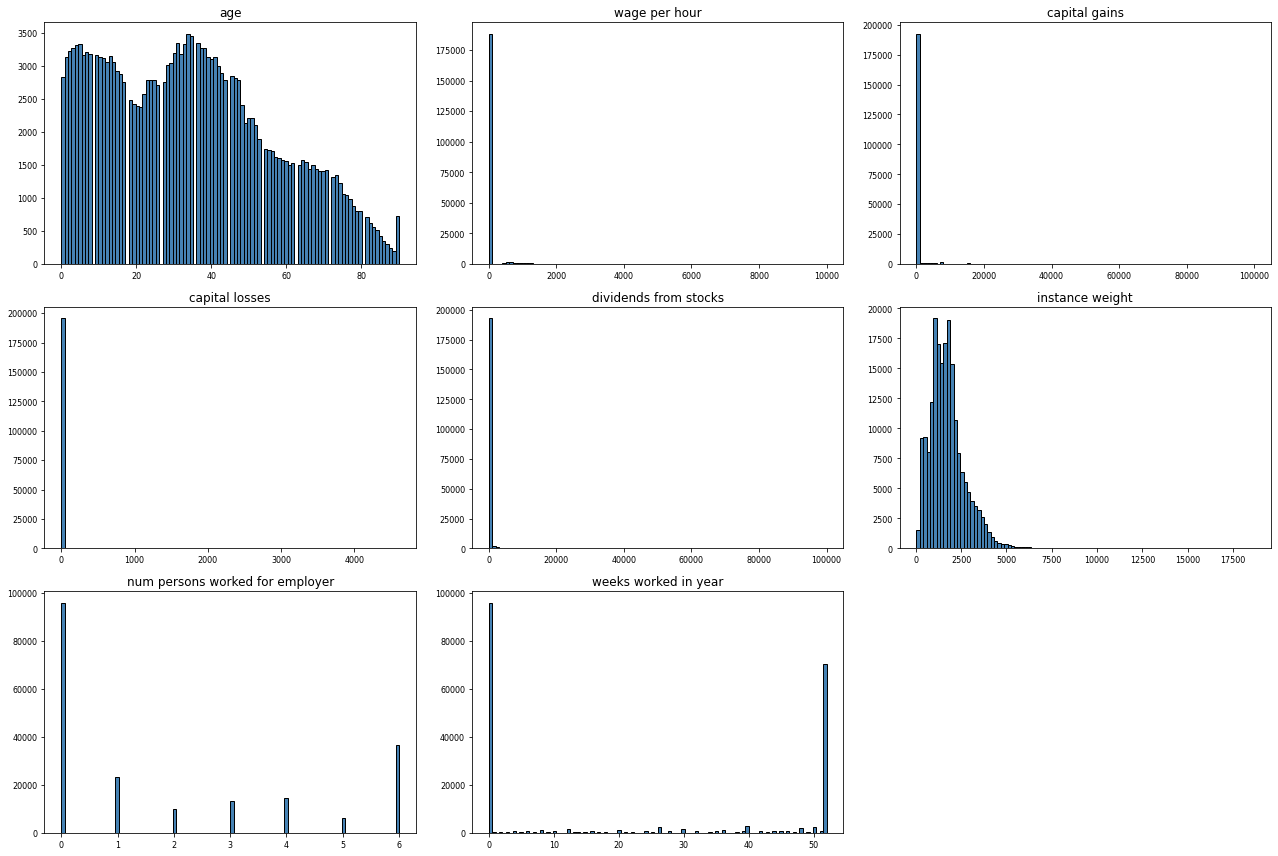

In [11]:
data.hist(bins=100, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 3, 3))

These plots show that the age distribution in the sample shows a large amount of very young people (< 20) and due to some reason a small spike at the top age bucket. Also there are virtually no or very few representatives that had either capital losses, capital gains or dividends from stocks. This might mbe an indicator, that the sample comprises only low income individuals. In any case, there are only few people who seem to onw stocks. Furthermore, wage per hor seems to be 0 in the majority of cases. This makes this dataset hard to use since this is the most ineresting variable of all.

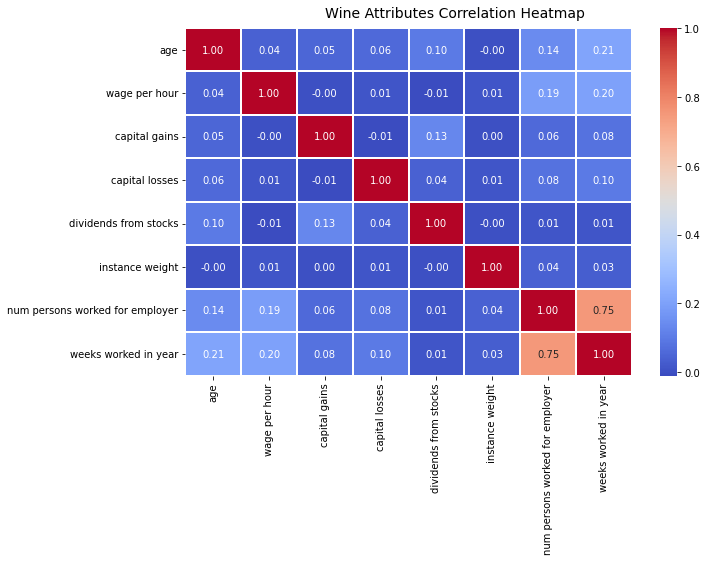

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

Not surprisingly there is a stron correlation between the number of persons who worked for an employer and the weeks worked in a year. However, the plot does not suggest any other correlations (nether negative nor positive).

In [13]:
cols = ['age', 'wage per hour', 'weeks worked in year', 'capital gains']
subset_df = data[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, data['sex']], axis=1)
final_df.head()

,age,wage per hour,weeks worked in year,capital gains,sex
0,1.725879,-0.201629,-0.949346,-0.092542,Female
1,1.053560,-0.201629,1.180804,-0.092542,Male
2,-0.739291,-0.201629,-0.949346,-0.092542,Female
3,-1.142682,-0.201629,-0.949346,-0.092542,Female
4,-1.097861,-0.201629,-0.949346,-0.092542,Female


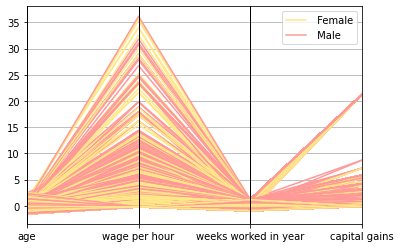

In [14]:
from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, 'sex', color=('#FFE888', '#FF9999'))

There does not seem to be any difference along gender in the dataset. Neither age, wage per hour, weeks worked nor captial gains seem to diverge.

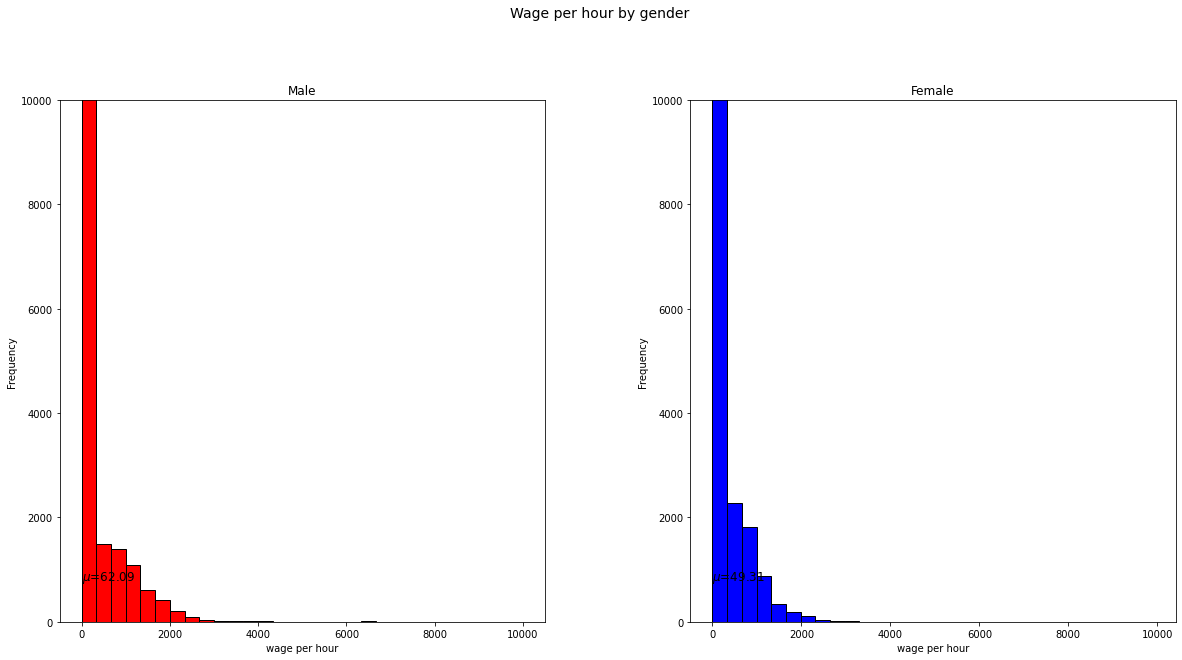

In [15]:
female = data[data.sex.str.contains("Female")]
male = data[data.sex.str.contains("Male")]

male.describe()

fig = plt.figure(figsize = (20,10))
title = fig.suptitle("Wage per hour by gender", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Male")
ax1.set_xlabel("wage per hour")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 10000])
ax1.text(1.2, 800, r'$\mu$='+str(round(male['wage per hour'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(male['wage per hour'], color='red', bins=30,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Female")
ax2.set_xlabel("wage per hour")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 10000])
ax2.text(0.8, 800, r'$\mu$='+str(round(female['wage per hour'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(female['wage per hour'], color='blue', bins=30,
                                     edgecolor='black', linewidth=1)

These plots also do not suggest a significant difference in wages earned by male and female people. There seem to be a lot of datapoints with a wage of 0.

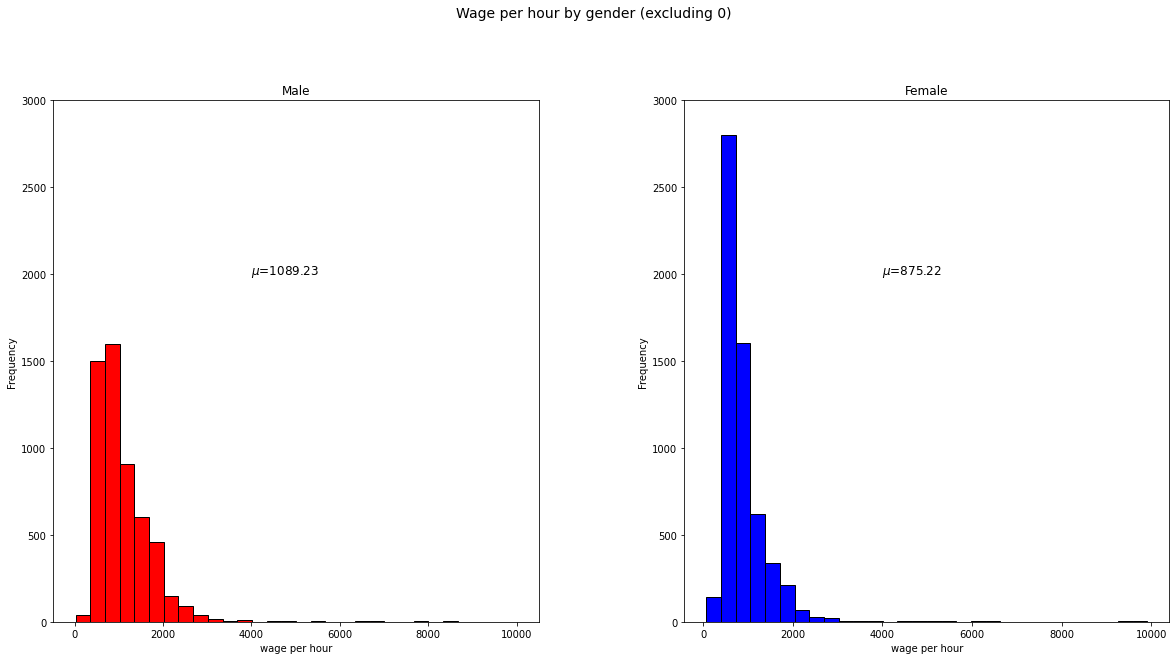

In [16]:
female_income = female[female['wage per hour'] > 0]
male_income = male[male['wage per hour'] > 0]

fig = plt.figure(figsize = (20,10))
title = fig.suptitle("Wage per hour by gender (excluding 0)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Male")
ax1.set_xlabel("wage per hour")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 3000])
ax1.text(4000, 2000, r'$\mu$='+str(round(male_income['wage per hour'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(male_income['wage per hour'], color='red', bins=30,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Female")
ax2.set_xlabel("wage per hour")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 3000])
ax2.text(4000, 2000, r'$\mu$='+str(round(female_income['wage per hour'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(female_income['wage per hour'], color='blue', bins=30,
                                     edgecolor='black', linewidth=1)

It seems that the average wage / hour is significantly higher among men.

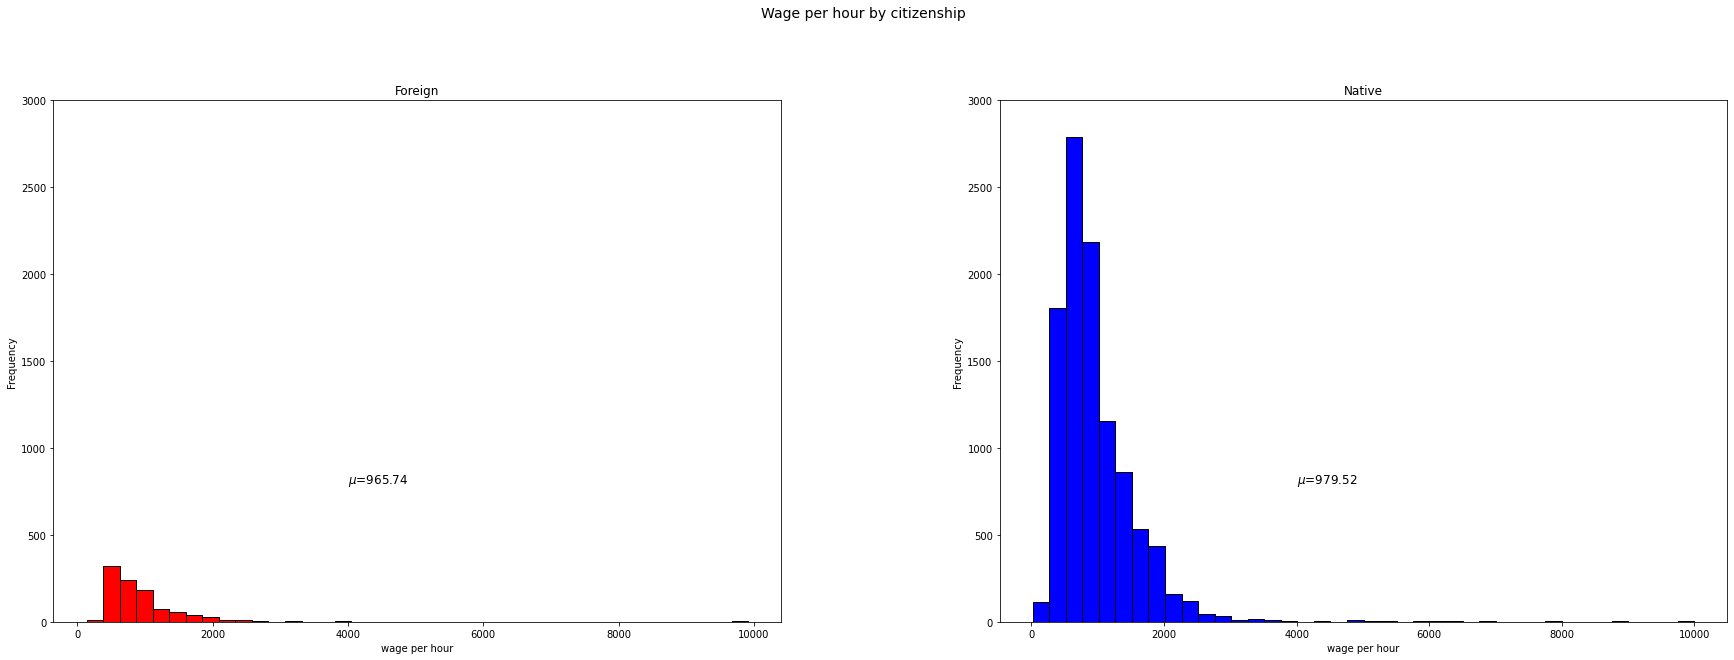

In [17]:
foreign = data[data['citizenship'].str.contains("Foreign")]
native = data[data['citizenship'].str.contains("Native")]

foreign_income = foreign[foreign['wage per hour'] > 0]
native_income = native[native['wage per hour'] > 0]

fig = plt.figure(figsize = (30,10))
title = fig.suptitle("Wage per hour by citizenship", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Foreign")
ax1.set_xlabel("wage per hour")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 3000])
ax1.text(4000, 800, r'$\mu$='+str(round(foreign_income['wage per hour'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(foreign_income['wage per hour'], color='red', bins=40,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Native")
ax2.set_xlabel("wage per hour")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 3000])
ax2.text(4000, 800, r'$\mu$='+str(round(native_income['wage per hour'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(native_income['wage per hour'], color='blue', bins=40,
                                     edgecolor='black', linewidth=1)

Even though the number of not foreign people in the sample is much lower, the mean wage per hour is 

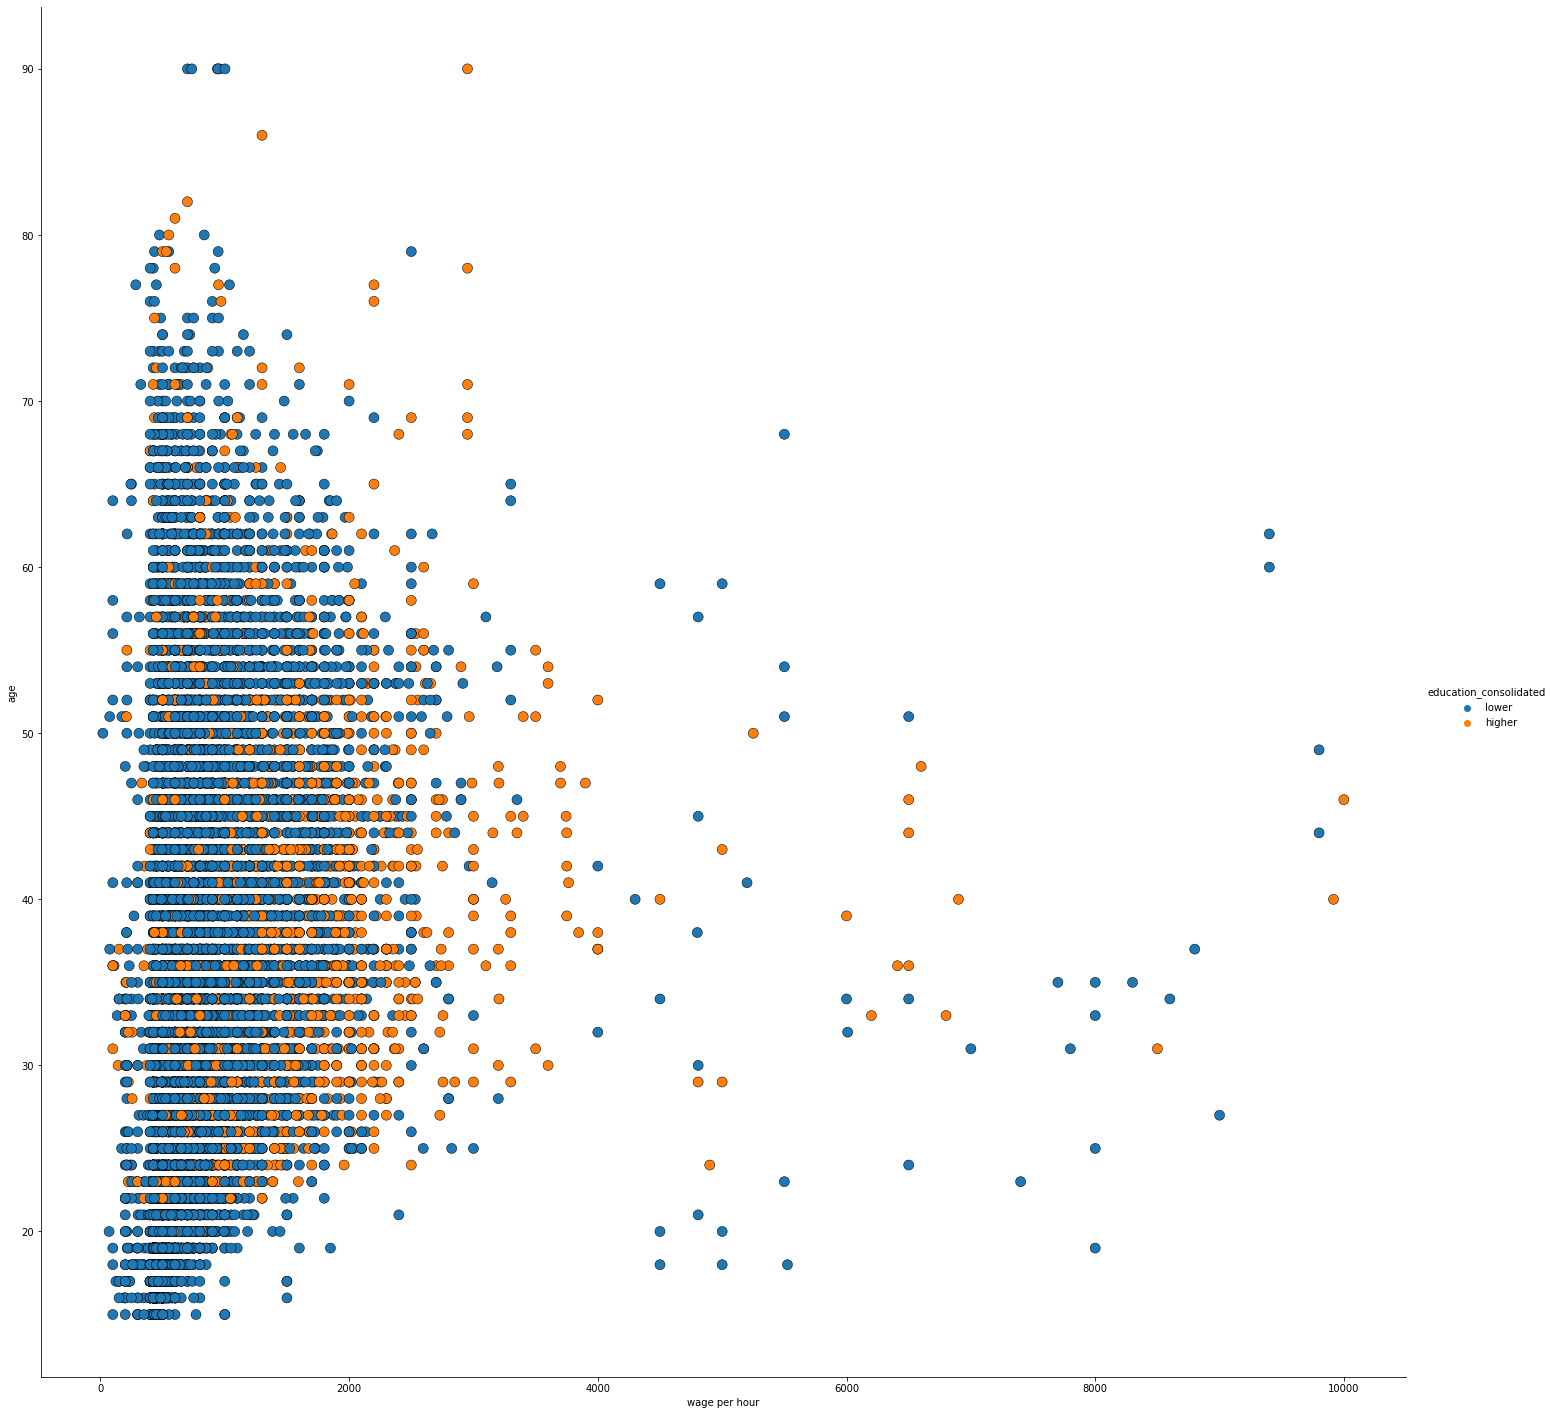

In [18]:
jp = sns.pairplot(data[data['wage per hour'] > 0], x_vars=["wage per hour"], y_vars=["age"], height=20,
                  hue="education_consolidated", plot_kws=dict(edgecolor="k", linewidth=0.5, s=100))

Surprisingly, the dataset does not show a strong distinction for wage per hour either in relation to education nor age (after removing all 0 wage per hour datapoints).

In [19]:
data = data[data['wage per hour'] > 0]
data = data[data['dividends from stocks'] > 0]
data.describe()

,age,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,weeks worked in year
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,42.967132,1286.392769,930.886606,45.414133,963.944947,1711.823821,4.449466,47.547247
std,12.392455,770.445603,5589.718309,295.742119,3186.555512,940.520087,1.852084,11.066245
min,16.000000,20.000000,0.000000,0.000000,1.000000,162.480000,0.000000,0.000000
25%,34.000000,770.000000,0.000000,0.000000,46.000000,1063.370000,3.000000,52.000000
50%,43.000000,1140.000000,0.000000,0.000000,170.000000,1625.150000,5.000000,52.000000
75%,52.000000,1650.000000,0.000000,0.000000,700.000000,2156.210000,6.000000,52.000000
max,90.000000,9800.000000,99999.000000,2467.000000,45000.000000,7088.750000,6.000000,52.000000


Text(0.5, 0, 'age')

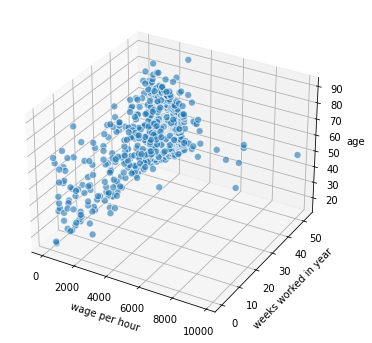

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data['wage per hour']
ys = data['weeks worked in year']
zs = data['age']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('wage per hour')
ax.set_ylabel('weeks worked in year')
ax.set_zlabel('age')

Although it is difficult to discern, one might recoginize a slight increase in wage per hour with the increase of weeks worked in a year. Also, with increased age, the weeks worked in a year increase as well, however, in this dataset, the increase seems unusually low.

The dataset shows a lot of participants with no income at all (neither wage per hour nor income from stocks). To have this missing data in a dataset called "Census Income" is rather disappointing, since these are the most interesting variables to analyze. What data remains after excluding 0 wage per hour datapoints, does not show a lot of significant value when visualizing the data.